In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

In [4]:
file = "C:/excel/New_Google_dataset.csv"
google = pd.read_csv(file)

print (google.head())

              App_Name_x                                        App_Id  \
0                GROW.me                          com.horodyski.grower   
1  The Everyday Calendar                        com.mozaix.simoneboard   
2  Readymade Grocery App  com.ionicfirebaseapp.readymadegroceryuserapp   
3           Barnets Hair                       com.phorest.barnetshair   
4                GaiaZOO                       nl.haveaniceday.gaiazoo   

         Category  Rating  Rating Count Installs  Minimum Installs  \
0           Tools     0.0             0     100+               100   
1       Lifestyle     2.0            39     500+               500   
2    Food & Drink     4.2            16   1,000+              1000   
3       Lifestyle     0.0             0     100+               100   
4  Travel & Local     3.4            67  10,000+             10000   

   Maximum Installs  Free_x  Price_x  ... Currency_y Free_y DeveloperId  \
0               478    True      0.0  ...        USD   True

In [5]:
x = google[['Maximum Installs']]
y = google['Rating']

In [6]:
#doing some extra cleaning here
google = google.dropna(subset=['Maximum Installs', 'Rating'])

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [9]:
y_pred = model.predict(x_test)


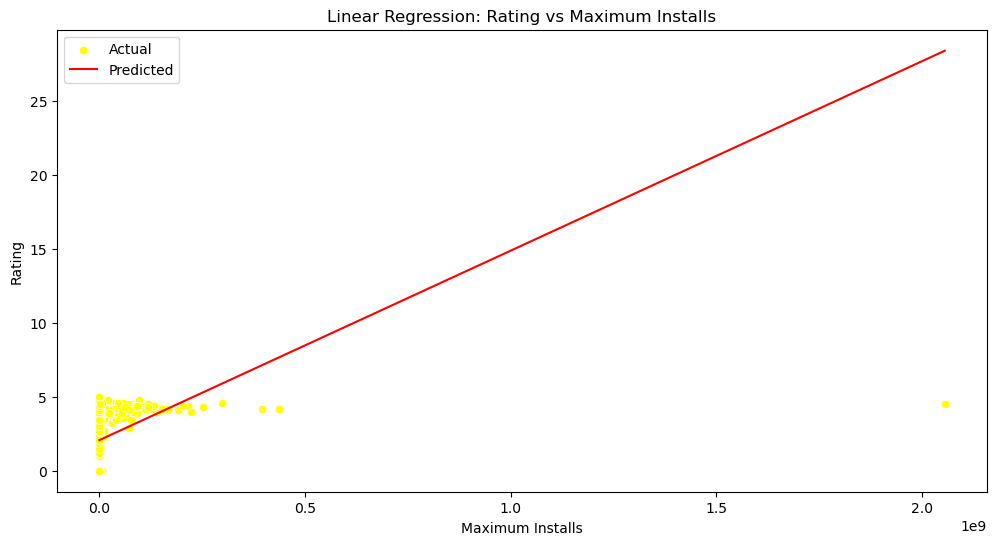

In [10]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=x_test['Maximum Installs'], y=y_test, label='Actual', color='yellow')
sns.lineplot(x=x_test['Maximum Installs'], y=y_pred, label='Predicted', color='red')
plt.xlabel('Maximum Installs')
plt.ylabel('Rating')
plt.title('Linear Regression: Rating vs Maximum Installs')
plt.show()

In [11]:
print(model.intercept_)
print(model.coef_)

2.0693955535805664
[1.28185317e-08]


In [12]:
model.score(x_train, y_train)

0.0027665179439344545

In [13]:
x_multi = google[['Maximum Installs', 'Rating Count', 'Price_x']]
y_multi = google['Rating']

In [14]:
google = google.dropna(subset=['Maximum Installs', 'Rating Count', 'Price_x', 'Rating'])

In [15]:
x_train_m, x_test_m, y_train_m, y_test_m = train_test_split(x_multi, y_multi, test_size=0.2, random_state=42)

In [16]:
multi_model = LinearRegression()
multi_model.fit(x_train_m, y_train_m)

LinearRegression()

In [17]:
y_pred_m = multi_model.predict(x_test_m)

In [18]:
print("Intercept:", multi_model.intercept_)
print("Coefficients:", multi_model.coef_)


Intercept: 2.068333222345567
Coefficients: [ 1.63503314e-08 -1.60669002e-07  5.36082846e-03]


In [19]:
multi_model.score(x_train_m, y_train_m)

0.003042774601952347

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
google[['Maximum Installs', 'Rating Count', 'Price_x']] = scaler.fit_transform(google[['Maximum Installs', 'Rating Count', 'Price_x']])



In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
google[['Maximum Installs', 'Rating Count', 'Price_x']] = scaler.fit_transform(google[['Maximum Installs', 'Rating Count', 'Price_x']])

In [26]:
# Normalize the features
scaler = StandardScaler()
x_normalized = scaler.fit_transform(google[['Maximum Installs', 'Rating Count', 'Price_x']])

# Train the model with normalized data
x_train_m, x_test_m, y_train_m, y_test_m = train_test_split(x_normalized, google['Rating'], test_size=0.2, random_state=42)

multi_model = LinearRegression()
multi_model.fit(x_train_m, y_train_m)


LinearRegression()

In [27]:
y_pred_m = multi_model.predict(x_test_m)

In [28]:
print("Intercept:", multi_model.intercept_)
print("Coefficients:", multi_model.coef_)

Intercept: 2.075059644316819
Coefficients: [ 0.14933617 -0.04056685  0.0109063 ]


In [29]:
multi_model.score(x_train_m, y_train_m)

0.003042774601952125